1. Импортируем необходимые библиотеки и загружаем данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('planets.csv')
df.head()

,Name,Node (degrees),Inclination (Degrees),Axis (Astronomic Units)
0,1935RF,130.916,4.659,2.2562
1,1941FD,132.200,4.700,2.1300
2,1955QT,130.070,4.790,2.1893
3,1940YL,338.333,16.773,2.7465
4,1953NH,339.625,16.067,2.7335


2. Получим информацию о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     19 non-null     object 
 1   Node (degrees)           19 non-null     float64
 2   Inclination (Degrees)    19 non-null     float64
 3   Axis (Astronomic Units)  19 non-null     float64
dtypes: float64(3), object(1)
memory usage: 740.0+ bytes


3. Проверяем наличие пропущенных значений и выбросов

In [4]:
print(df.isnull().sum())

Name                       0
Node (degrees)             0
Inclination (Degrees)      0
Axis (Astronomic Units)    0
dtype: int64


Пропущенные значения отсутствуют, переходим сразу к нормализации

4. Применяем операцию нормализации для численной устойчивости

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

,copy,True
,with_mean,True
,with_std,True


5. Приведем данные к единому масштабу

In [21]:
X = scaler.fit_transform(df[numeric_cols])
X[:5]

array([[-0.00628883, -0.34042566, -0.99362188],
       [ 0.00946942, -0.33111612, -1.30682934],
       [-0.01667161, -0.31068054, -1.15965658],
       [ 2.5392959 ,  2.41020314,  0.22322138],
       [ 2.55515234,  2.24989738,  0.19095754]])

6. Определяем оптимальное количество кластеров методом локтя

In [23]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

from sklearn.cluster import KMeans

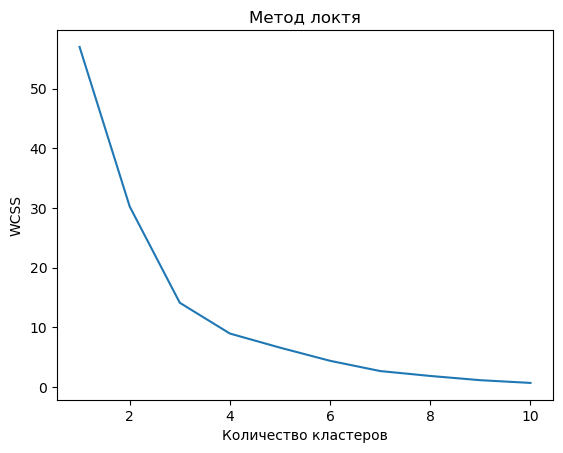

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

На графике виден локоть в области 3 кластера, поэтому возьмём это число.

7. Обучаем модель кластеризации

In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


8. Предсказываем кластеры и визиализируем результаты

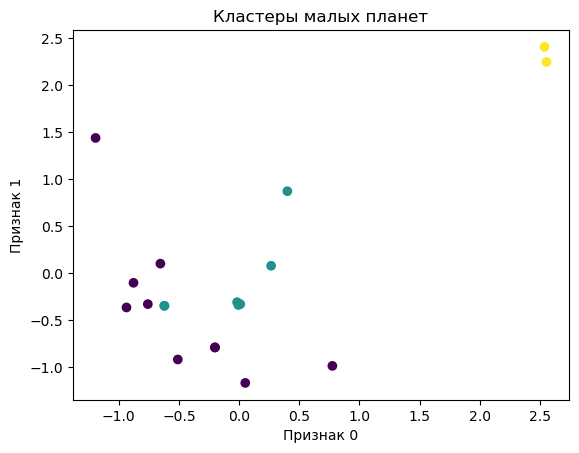

In [28]:
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Кластеры малых планет')
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.show()

9. Интерпретируем результаты

In [29]:
X[:5]

array([[-0.00628883, -0.34042566, -0.99362188],
       [ 0.00946942, -0.33111612, -1.30682934],
       [-0.01667161, -0.31068054, -1.15965658],
       [ 2.5392959 ,  2.41020314,  0.22322138],
       [ 2.55515234,  2.24989738,  0.19095754]])

In [30]:
labels

array([1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int32)

In [44]:
df['Label'] = labels

In [45]:
df.head()

,Name,Node (degrees),Inclination (Degrees),Axis (Astronomic Units),label,Label
0,1935RF,130.916,4.659,2.2562,1,1
1,1941FD,132.200,4.700,2.1300,1,1
2,1955QT,130.070,4.790,2.1893,1,1
3,1940YL,338.333,16.773,2.7465,2,2
4,1953NH,339.625,16.067,2.7335,2,2


In [47]:
df.groupby('Label').mean(numeric_only=True)

,Node (degrees),Inclination (Degrees),Axis (Astronomic Units),label
Label,,,,
0,94.718800,4.4274,2.965950,0.0
1,124.570571,5.6990,2.190729,1.0
2,338.979000,16.4200,2.740000,2.0


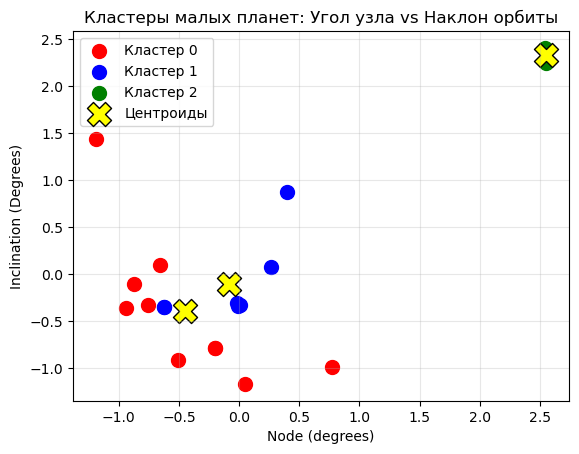

In [58]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Кластер 0')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Кластер 1')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Кластер 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Центроиды', marker='X', edgecolors='black')

plt.title('Кластеры малых планет: Угол узла vs Наклон орбиты')
plt.xlabel('Node (degrees)')
plt.ylabel('Inclination (Degrees)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

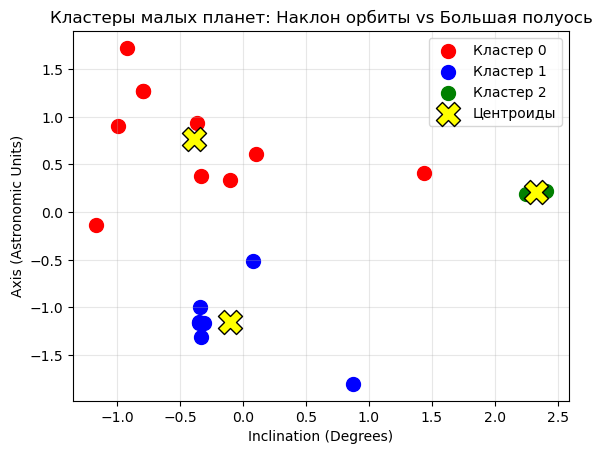

In [56]:
plt.scatter(X[labels == 0, 1], X[labels == 0, 2], s = 100, c = 'red', label = 'Кластер 0')
plt.scatter(X[labels == 1, 1], X[labels == 1, 2], s = 100, c = 'blue', label = 'Кластер 1')
plt.scatter(X[labels == 2, 1], X[labels == 2, 2], s = 100, c = 'green', label = 'Кластер 2')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s = 300, c = 'yellow', label = 'Центроиды', marker='X', edgecolors='black')
plt.title('Кластеры малых планет: Наклон орбиты vs Большая полуось')
plt.xlabel('Inclination (Degrees)')
plt.ylabel('Axis (Astronomic Units)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

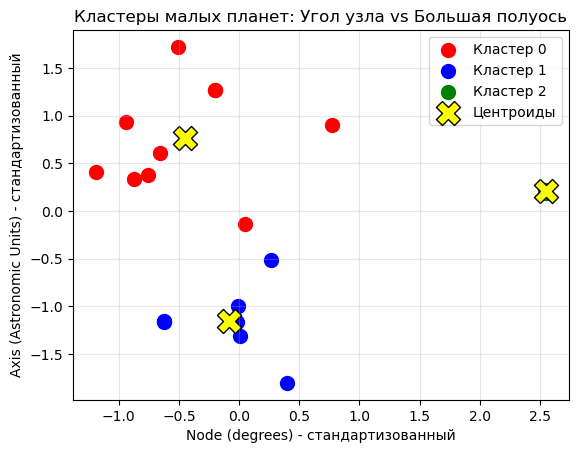

In [61]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 2], s = 100, c = 'red', label = 'Кластер 0')
plt.scatter(X[labels == 1, 0], X[labels == 1, 2], s = 100, c = 'blue', label = 'Кластер 1')
plt.scatter(X[labels == 2, 0], X[labels == 2, 2], s = 100, c = 'green', label = 'Кластер 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            s = 300, c = 'yellow', label = 'Центроиды', marker='X', edgecolors='black')

plt.title('Кластеры малых планет: Угол узла vs Большая полуось')
plt.xlabel('Node (degrees) - стандартизованный')
plt.ylabel('Axis (Astronomic Units) - стандартизованный')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Модель K-means успешно разделила малые планеты на 3 отчетливых кластера, что подтверждается: четкой пространственной разделимостью кластеров на графиках; значительным расстоянием между центроидами, особенно между кластером 2 и остальными; минимальным перекрытием точек между кластерами, что свидетельствует о хорошем разделении.

10. Визуализация результатов

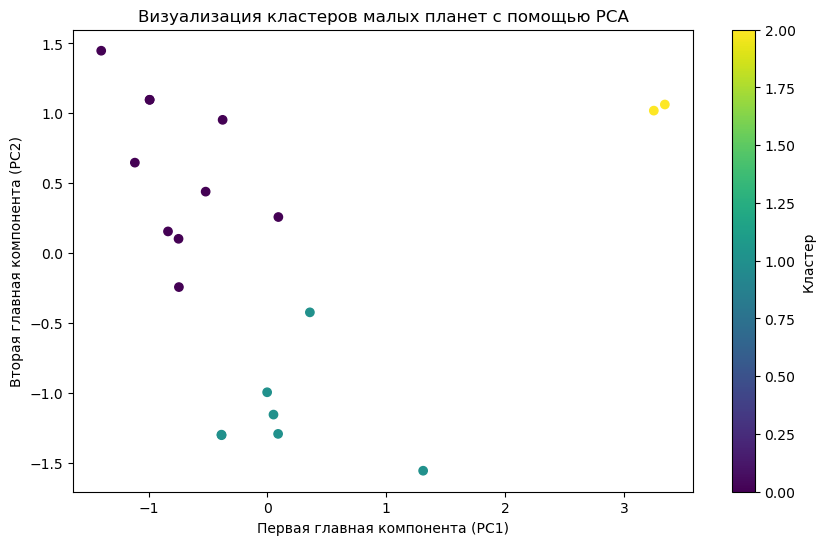

In [65]:
from sklearn.decomposition import PCA

# Уменьшаем размерность до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.title('Визуализация кластеров малых планет с помощью PCA')
plt.colorbar(label='Кластер')
plt.show()

Три кластера визуально хорошо различимы, что подтверждает эффективность проведенной кластеризации. Кластер 0 изображен фиолетовыми точками, занимает левую верхнюю часть графика. Кластер 1 изображен зелеными точками, расположен приблизительно в центральной части. Кластер 2 изображен желтыми точками, занимает правую верхнюю область графика.

Кластер 2 наиболее удален от остальных кластеров, что свидетельствует о его выраженной уникальности и существенных отличиях от других групп малых планет. Кластеры 0 и 1 ближе расположены друг к другу, но все же сохраняют четкие границы разделения. По оси PC1 кластер 0 занимает крайнее левое положение, что говорит о наличии у объектов этого кластера характеристик, существенно отличающихся от объектов других кластеров. Кластер 1 занимает промежуточное положение между кластерами 0 и 2 по обеим главным компонентам, что указывает на его смешанные характеристики, частично схожие с обоими другими кластерами, но при этом сохраняющие собственную уникальность.

Распределение точек внутри кластеров демонстрирует хорошую компактность. Кластер 0 показывает разброс, но при этом сохраняет четкую принадлежность к своей группе. Относительная близость кластеров 0 и 1 при их четком разделении позволяет предположить наличие определенных общих орбитальных характеристик у этих групп планет, при сохранении существенных различий, выявленных алгоритмом кластеризации.